## BASEBALL PROJECT NO.02

Project Statement:

The dataset utilizes data from 2014 Major League Baseball in order to develop an algorithm that predicts the number of wins for a given team in 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the outputs will be a value that represents the nos. ofwins

 Input features:    Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Outputs: Number of predicted wins(W)

In [1]:
#Loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv(r'C:\Users\RSarkar\Desktop\phase 1 project\baseball.csv')

print(data)

      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572

In [3]:
#Let's see the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
data.shape #shape of data

(30, 17)

In [5]:
data.isnull().sum()

In [6]:
# lets see the name of features and target
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### As per Observation:
    The dataset is little small only 30 rows and 17 columns are there
    
    All the features are continuous in nature and ERA(Earned Run Average) feature is in float type
    
    Great! no NULL value is there in data
    
    As the data is continuous in nature and target varible also as integer data type, we can say it is Regression Problem statement
    
  

In [7]:
#lets see the uniqness of features and label

data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

We see that most of the columns have continuos data and most are int as they contain match data and pertain to ne non decimal numbers except for ERA which is decimal as it is average of run

In [8]:
# Last we will check wether there were any whitespace is in dataset

data.loc[data['W'] ==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


Great! There is no blankspace is in dataset,so let's proceed

### Lets Visualize how the data is distributed for every column

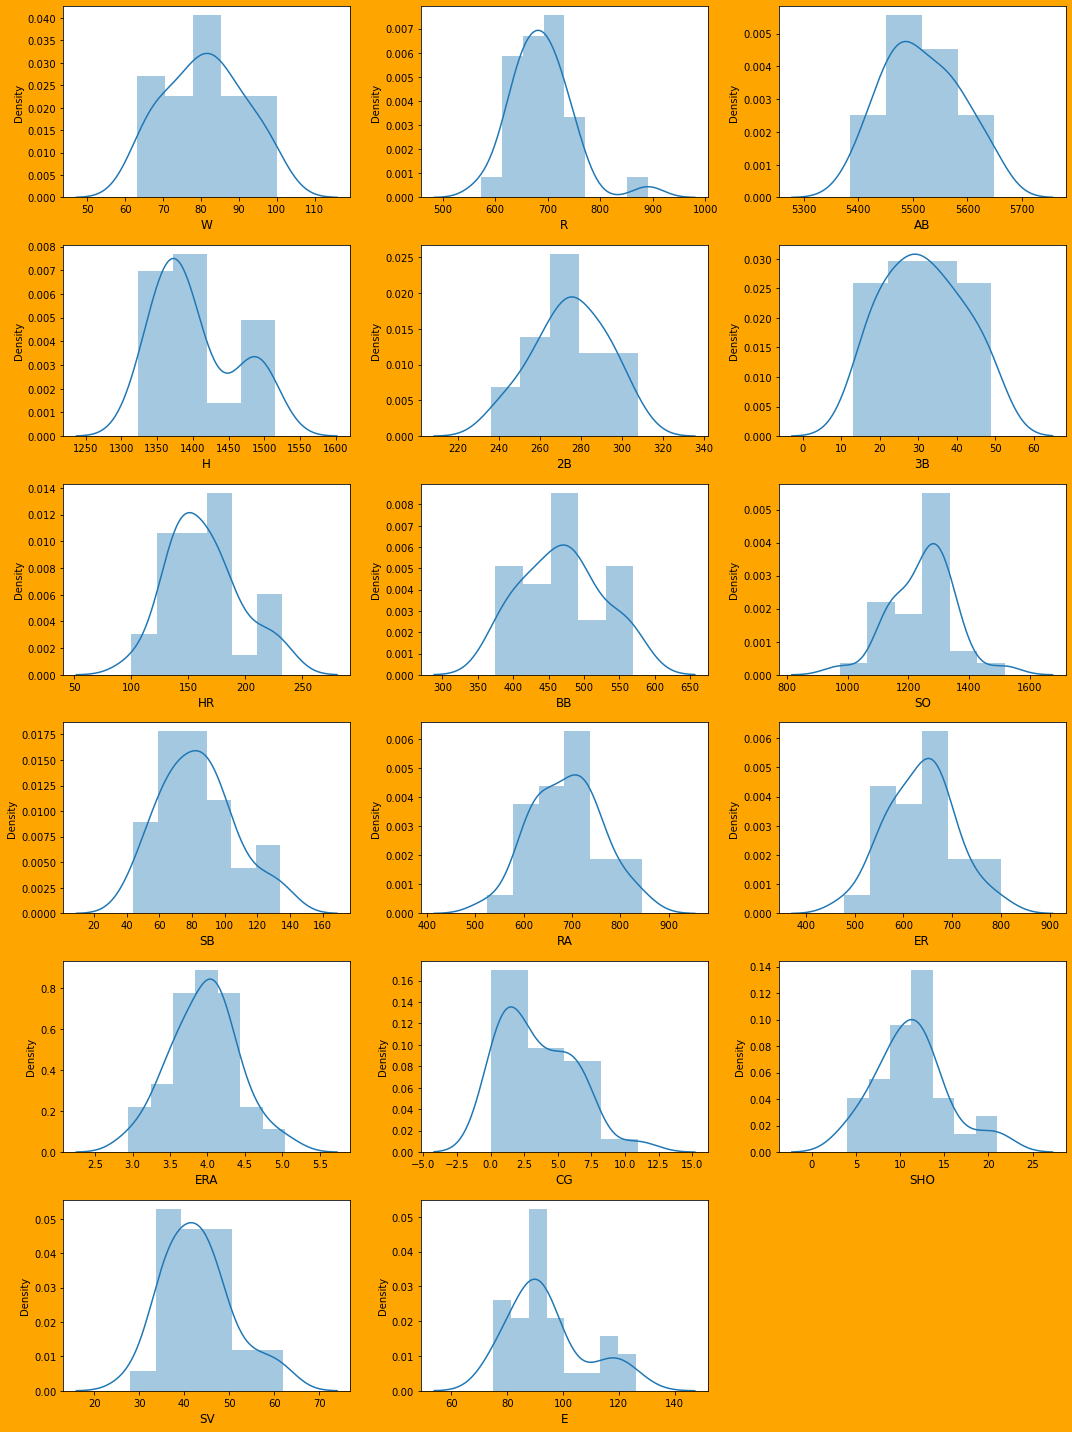

In [9]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(15,20), facecolor = 'orange')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

### Observations: 
    As we see the columns they are relatively symmentry
    
    Some columns have majority of data with in a specific range like R,AB,H,SV
    
    We see 3B is having unifrom distribution wherein all the rows have same scores with number ,  Similar trend is seen in ERA, and SV.
    
    - the data is very less so we cannot assume that this is the overall range of that particular statistic, but for this dataset we can assume the following conditions

Lets graph the data for columns individually so we can make clear findings

<AxesSubplot:xlabel='W', ylabel='Density'>

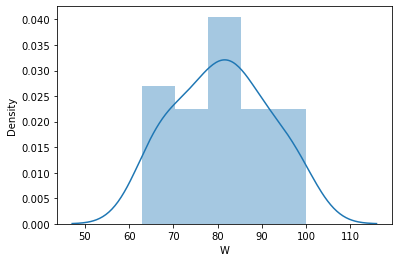

In [10]:
sns.distplot(data['W'],kde=True) 

Target variable looks good no outliers, uniformin nature,the max of the rows lie in range 80-85 lets check with the histplot

<AxesSubplot:xlabel='W', ylabel='Count'>

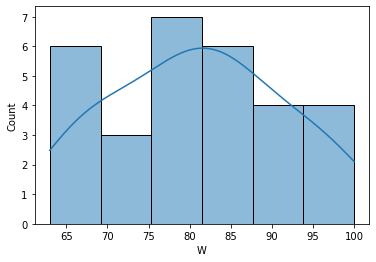

In [11]:
sns.histplot(data['W'],kde=True) 

As per above observation data range lies 80-85 and no outliers

<AxesSubplot:xlabel='R', ylabel='Density'>

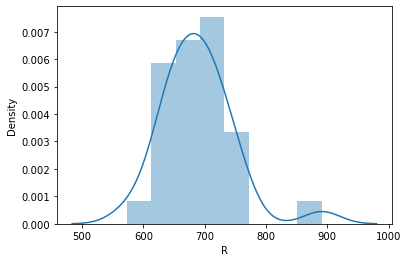

In [12]:
sns.distplot(data['R'],kde=True) 

<AxesSubplot:xlabel='R', ylabel='Count'>

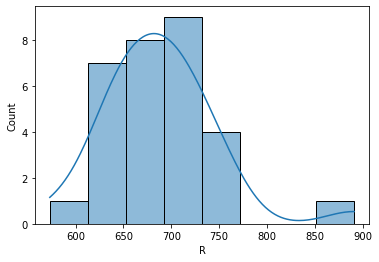

In [13]:
sns.histplot(data['R'],kde=True) 

The column is relatively normally distributed but we see from 800 range some outliersare there

<AxesSubplot:xlabel='AB', ylabel='Density'>

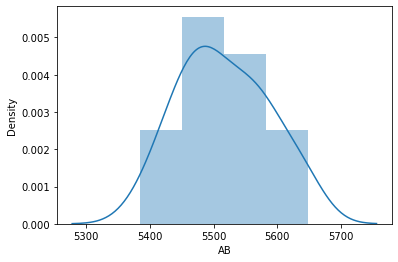

In [14]:
sns.distplot(data['AB'],kde=True) 

<AxesSubplot:xlabel='AB', ylabel='Count'>

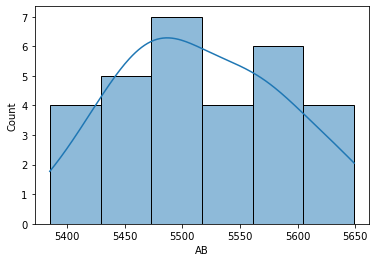

In [15]:
sns.histplot(data['AB'],kde=True) 

The 'AB' column is symmetry distribution, the range of column is high and the column with no outliers.

<AxesSubplot:xlabel='H', ylabel='Density'>

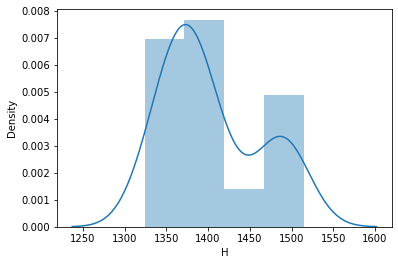

In [17]:
sns.distplot(data['H'],kde=True) 

<AxesSubplot:xlabel='H', ylabel='Count'>

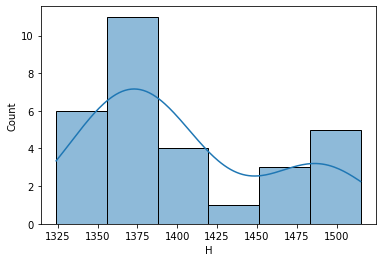

In [18]:
sns.histplot(data['H'],kde=True) 

The H column we see here is also having a relatively normally distributed data , the number of count at 1425 is very low

<AxesSubplot:xlabel='2B', ylabel='Density'>

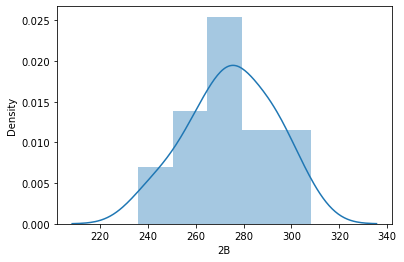

In [19]:
sns.distplot(data['2B'],kde=True) 

<AxesSubplot:xlabel='2B', ylabel='Count'>

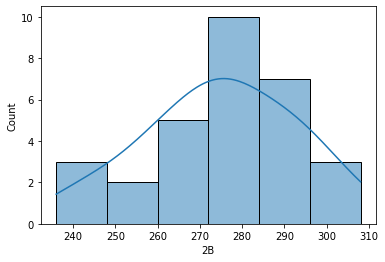

In [20]:
sns.histplot(data['2B'],kde=True) 

The column is looking good, normally distributed, we see the range is low but no outliers is there

<AxesSubplot:xlabel='3B', ylabel='Density'>

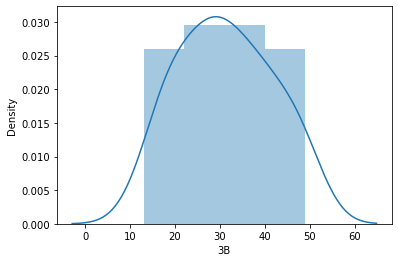

In [21]:
sns.distplot(data['3B'],kde=True) 

<AxesSubplot:xlabel='3B', ylabel='Count'>

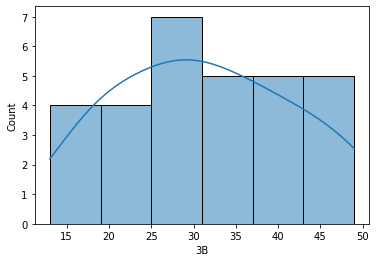

In [22]:
sns.histplot(data['3B'],kde=True) 

Data is normally distributed and no outliers is there, let's move for next feature

<AxesSubplot:xlabel='HR', ylabel='Density'>

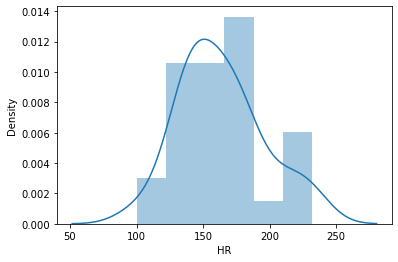

In [23]:
sns.distplot(data['HR'],kde=True) 

<AxesSubplot:xlabel='HR', ylabel='Count'>

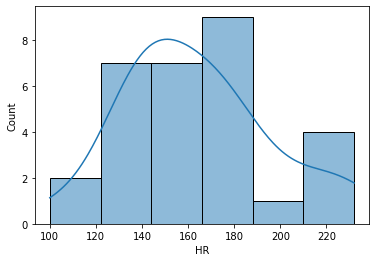

In [24]:
sns.histplot(data['HR'],kde=True) 

We see that there is uniform distribution in the range of this columns 

<AxesSubplot:xlabel='BB', ylabel='Density'>

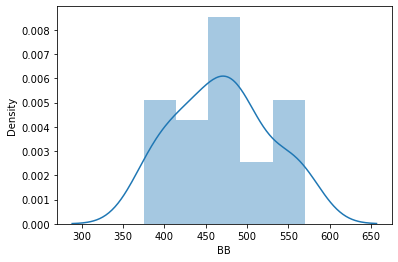

In [25]:
sns.distplot(data['BB'],kde=True) 

<AxesSubplot:xlabel='BB', ylabel='Count'>

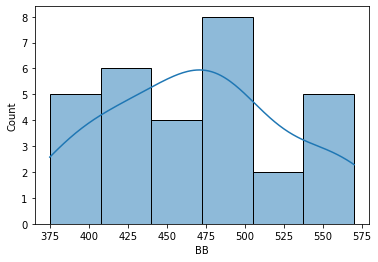

In [26]:
sns.histplot(data['BB'],kde=True) 

Here we see again some relatively normal distribution , just some columns have lower weightage , the highest here is 470 to 510 and lowest is 510 to 532

<AxesSubplot:xlabel='SO', ylabel='Density'>

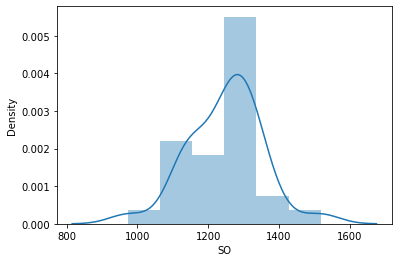

In [27]:
sns.distplot(data['SO'],kde=True) 

<AxesSubplot:xlabel='SO', ylabel='Count'>

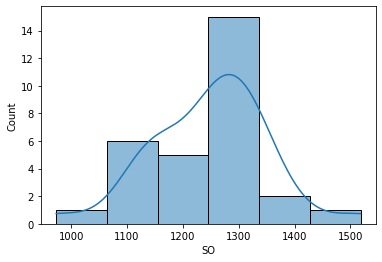

In [28]:
sns.histplot(data['SO'],kde=True) 

Here we see again some relatively normal distribution, majority of range 1250 to 1350

<AxesSubplot:xlabel='SB', ylabel='Density'>

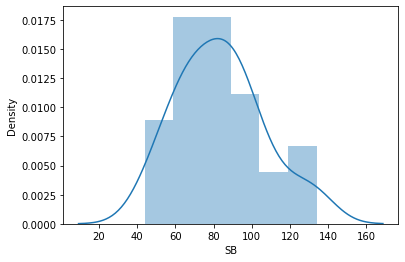

In [29]:
sns.distplot(data['SB'],kde=True) 

<AxesSubplot:xlabel='SB', ylabel='Count'>

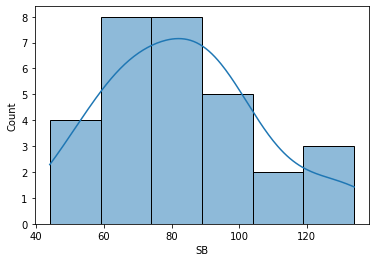

In [30]:
sns.histplot(data['SB'],kde=True)

The graph is relatively normal distribution , some columns have lower weightage ,60 to 95 have high range 

<AxesSubplot:xlabel='RA', ylabel='Density'>

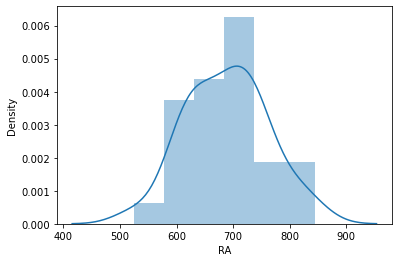

In [31]:
sns.distplot(data['RA'],kde=True)

<AxesSubplot:xlabel='RA', ylabel='Count'>

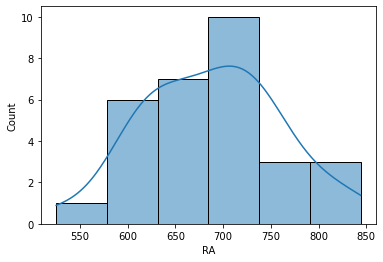

In [32]:
sns.histplot(data['RA'],kde=True)

The data is normally distributed and we see range 680 to 720 is highest number of rows and 525 to 575 is the lowest

<AxesSubplot:xlabel='ER', ylabel='Density'>

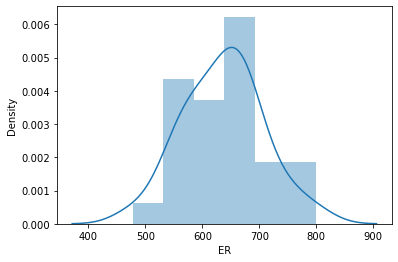

In [33]:
sns.distplot(data['ER'],kde=True)

<AxesSubplot:xlabel='ER', ylabel='Count'>

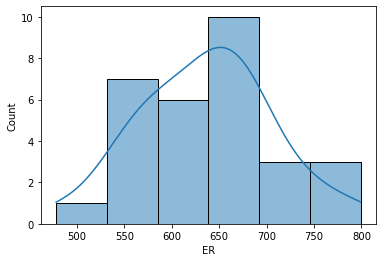

In [34]:
sns.histplot(data['ER'],kde=True)

We can see that data relatively normal distributed, 650 to 700 is the high range data

<AxesSubplot:xlabel='ERA', ylabel='Density'>

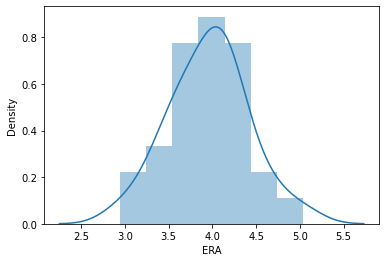

In [35]:
sns.distplot(data['ERA'],kde=True)

<AxesSubplot:xlabel='ERA', ylabel='Count'>

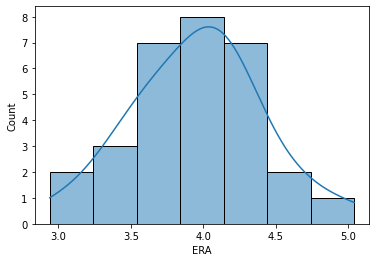

In [36]:
sns.histplot(data['ERA'],kde=True)

This the the pefect normally distribution graph with no outliers

<AxesSubplot:xlabel='CG', ylabel='Density'>

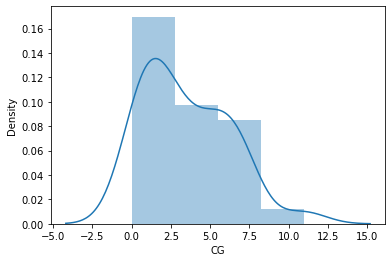

In [37]:
sns.distplot(data['CG'],kde=True)

<AxesSubplot:xlabel='CG', ylabel='Count'>

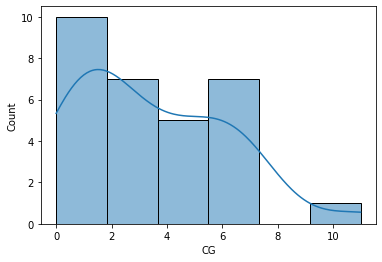

In [38]:
sns.histplot(data['CG'],kde=True)

The above graph is right skewed and also from 9 to 10 outliers can be seen

<AxesSubplot:xlabel='SHO', ylabel='Density'>

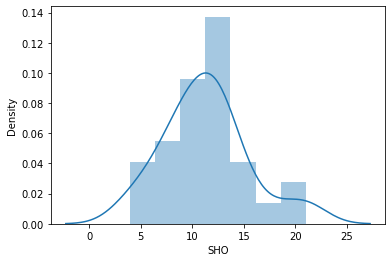

In [39]:
sns.distplot(data['SHO'],kde=True)

<AxesSubplot:xlabel='SHO', ylabel='Count'>

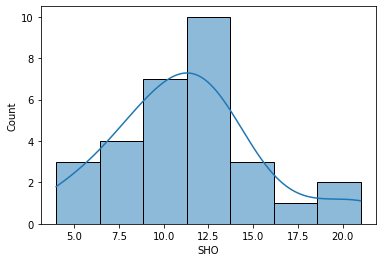

In [40]:
sns.histplot(data['SHO'],kde=True)

We see that the graph is normally distributed, the highest range is between 10.0 to 12.5 and the lowest is 15.0 to 17.5

<AxesSubplot:xlabel='SV', ylabel='Density'>

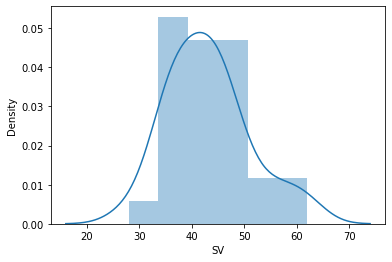

In [41]:
sns.distplot(data['SV'],kde=True)

<AxesSubplot:xlabel='SV', ylabel='Count'>

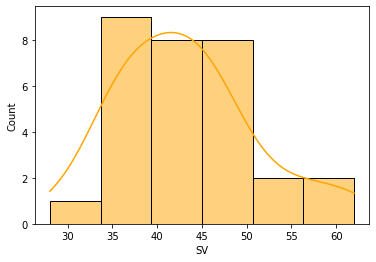

In [42]:
sns.histplot(data['SV'],kde=True,color ="orange")

In the SV columns as well we see that the data is normal relatively without outliers

<AxesSubplot:xlabel='E', ylabel='Density'>

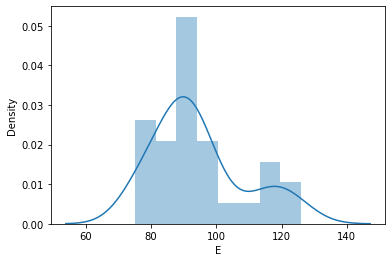

In [43]:
sns.distplot(data['E'],kde=True)

<AxesSubplot:xlabel='E', ylabel='Count'>

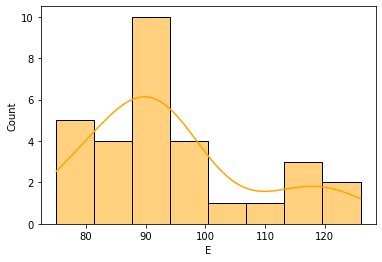

In [44]:
sns.histplot(data['E'],kde=True,color ="orange")

In the SHO columns as well we see that the data is normal relatively, we need to remeber that the dataset is very small so this may not be true for the games statistic

### Let's see the relation between Features and Target variables

In [45]:
# SPlit the data
x = data.drop(columns ='W')
y = data['W']

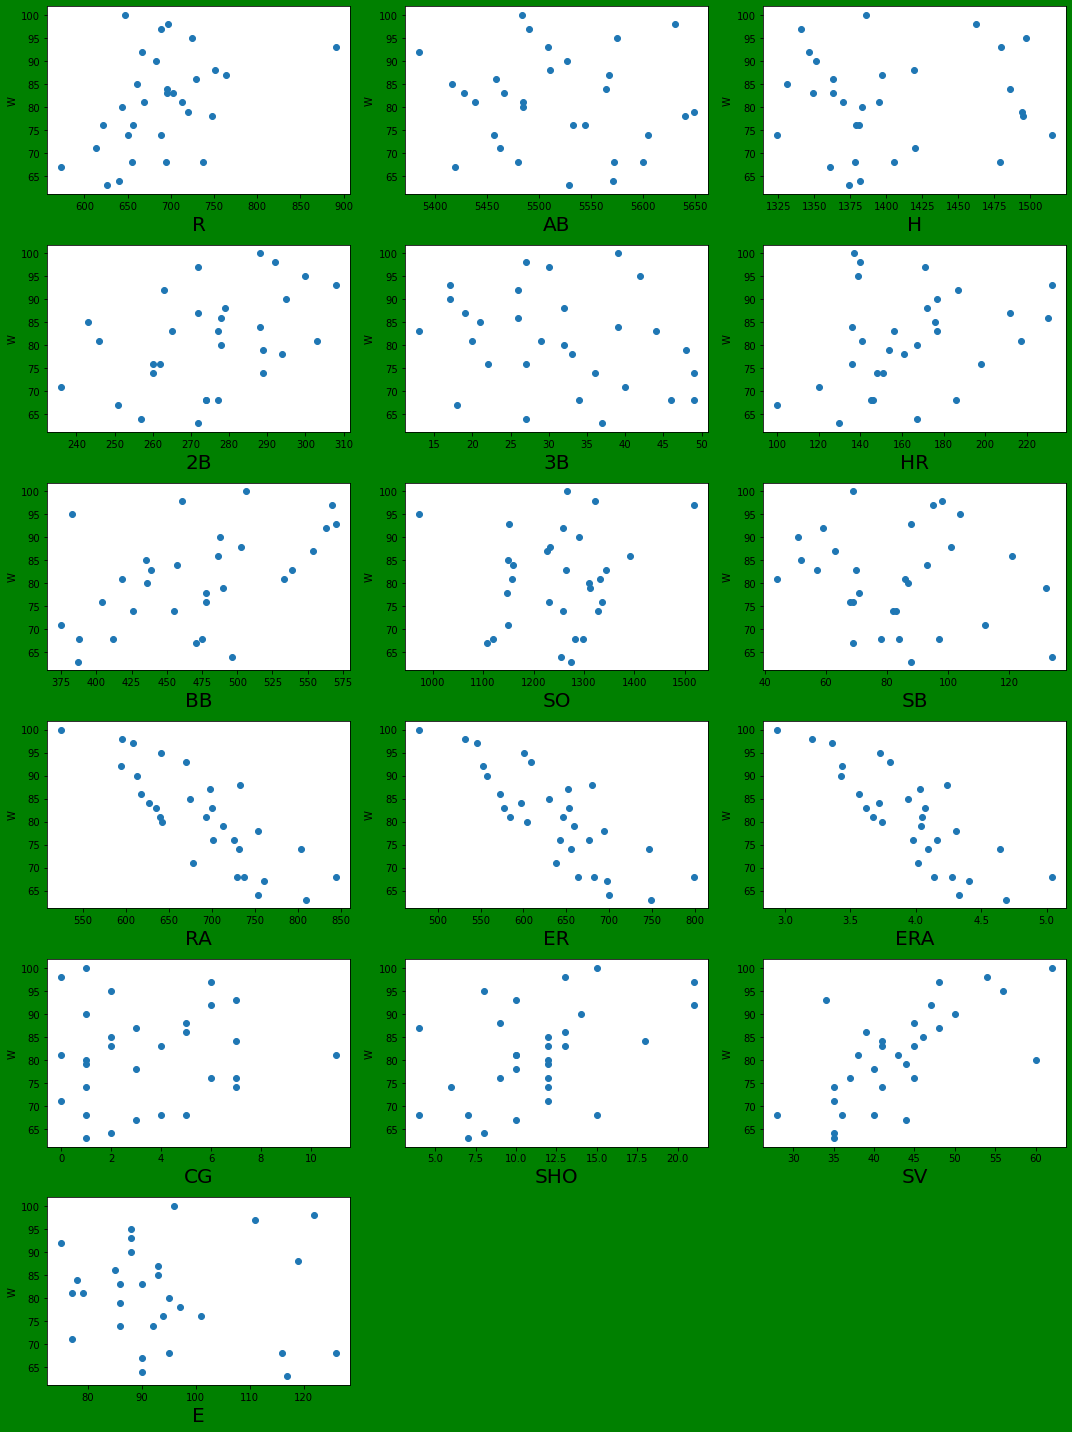

In [46]:
#Let's Visualize the Relationship between independent and dependent variables

plt.figure(figsize =(15,20), facecolor = 'green')
plotnumber = 1

for column in x:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('W',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


### Observations form the plots:-

> we see that the relationship of all thecolumns are not uniform , we also see that there are some columns which are not showing a trend or no relationship - i.e  AB , H , 3B, SB, CG, SHO, E
    
> showing postive relationship i.e R, 2B, HR, BB, SO, SV  
  showing negative relationship i.e RA, ER, ERA,  

> We need to remeber the size of the dataset to play a role in this formation of the pattern as well , as we have only 30 points in each plot 

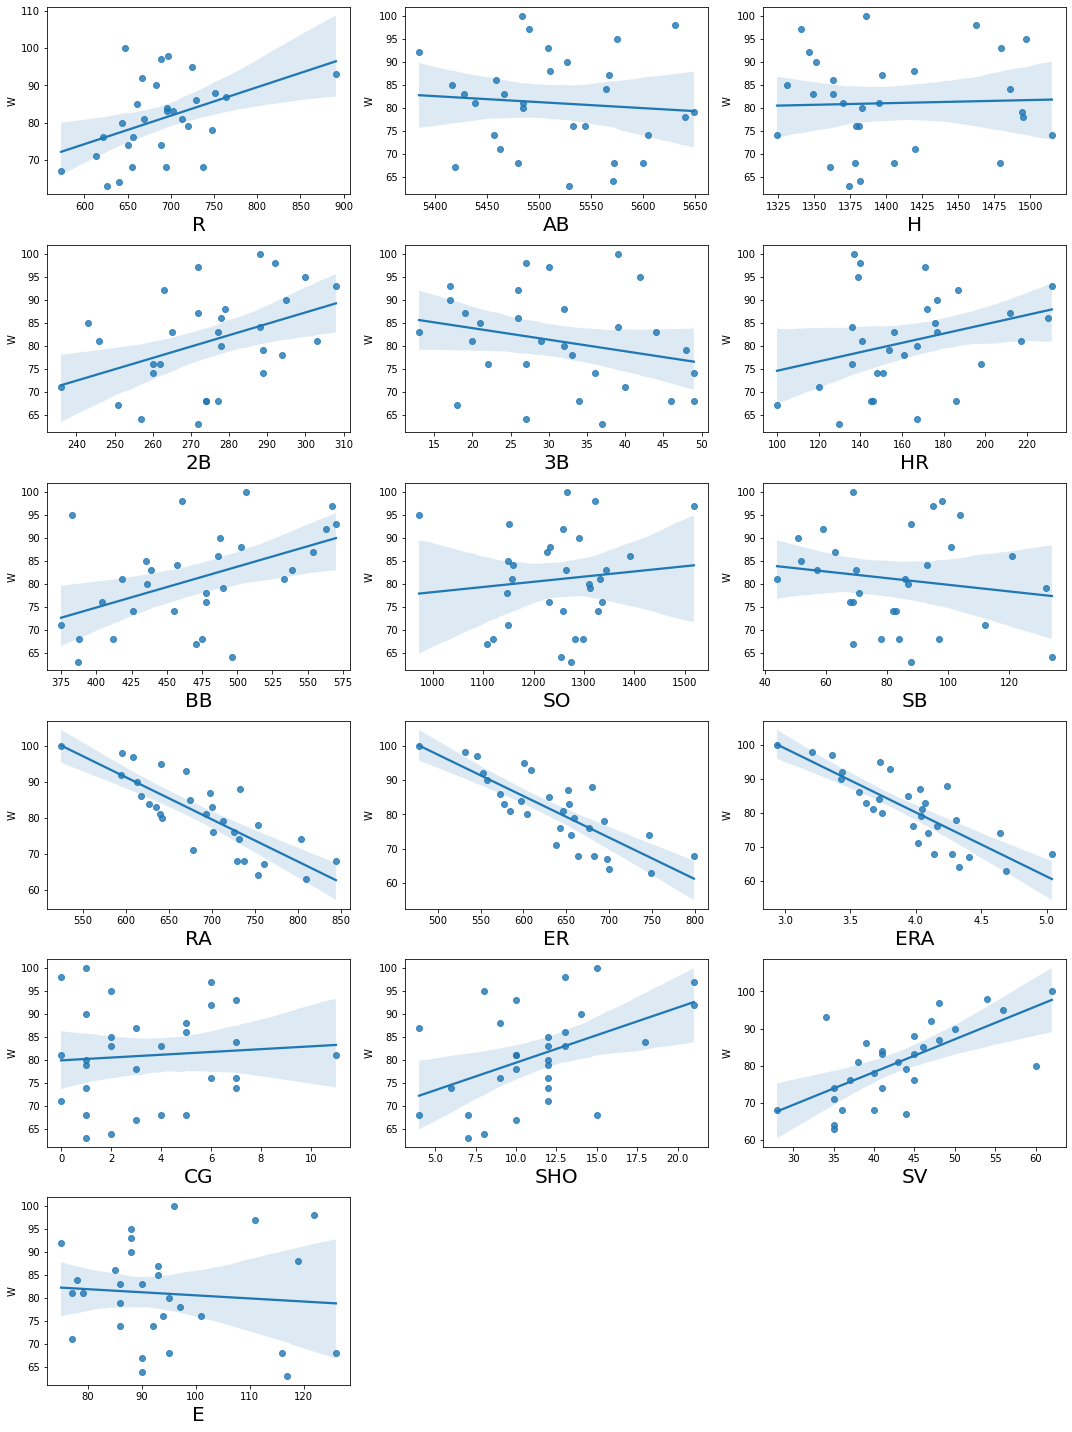

In [47]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('W',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

Finally we are using Reg plot to even more further prove that the observations made are showing the same relationship in thsi type of plot as well .

### EDA

In [48]:
# Describing the Dataset
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:-

We see that the column CG has mean of 3.46 approx and Std of 2.776 and the min is 0 and max is 11 so there is some ouliers and we need to treat the skewness in the data

we see that SHO columns has min of 4 and max of 21 which shows some outliers are presendting this columns as well

the rest of the columns do not show any signs of having extreme values or skewness as off now lets us plot it to study further

Lets us plot the data we have plotted now

Visualization of the Data Properties

<AxesSubplot:>

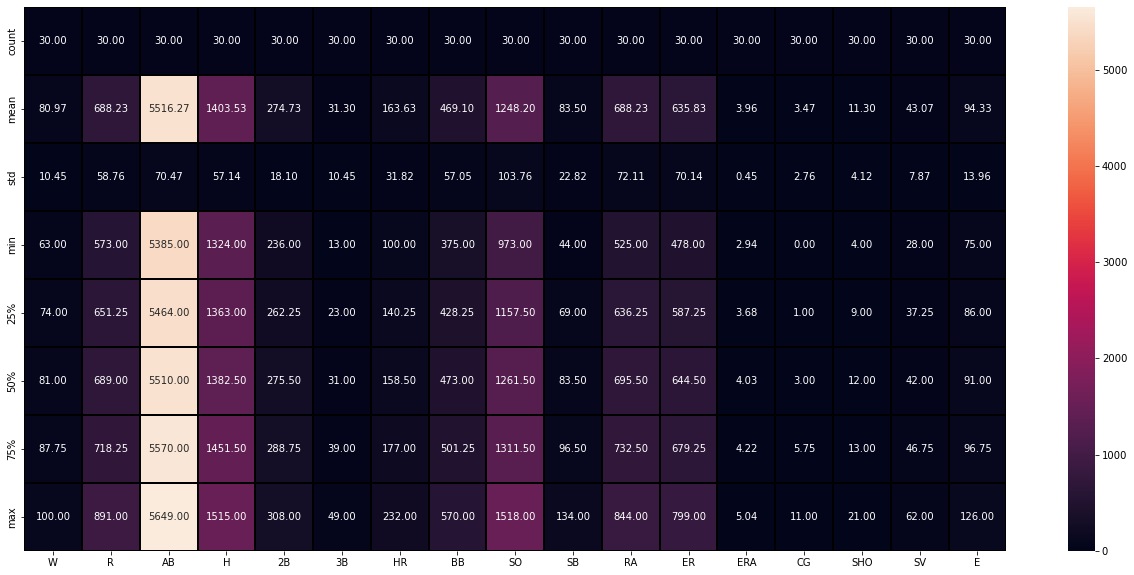

In [49]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see that the data is not scaled so we have some extreme values in AB column and H as well as SO column , there is some high values in BB, RA as well as ER so we need to treatthem by standardization

In [50]:
#Correlation of the columns with the target Columns
data.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

We see that Sv has the highest correlation with the target variable having a score of 0.66 which is the highest and ERA, RA as well as ER have the lowest correlation with the target variable

### Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

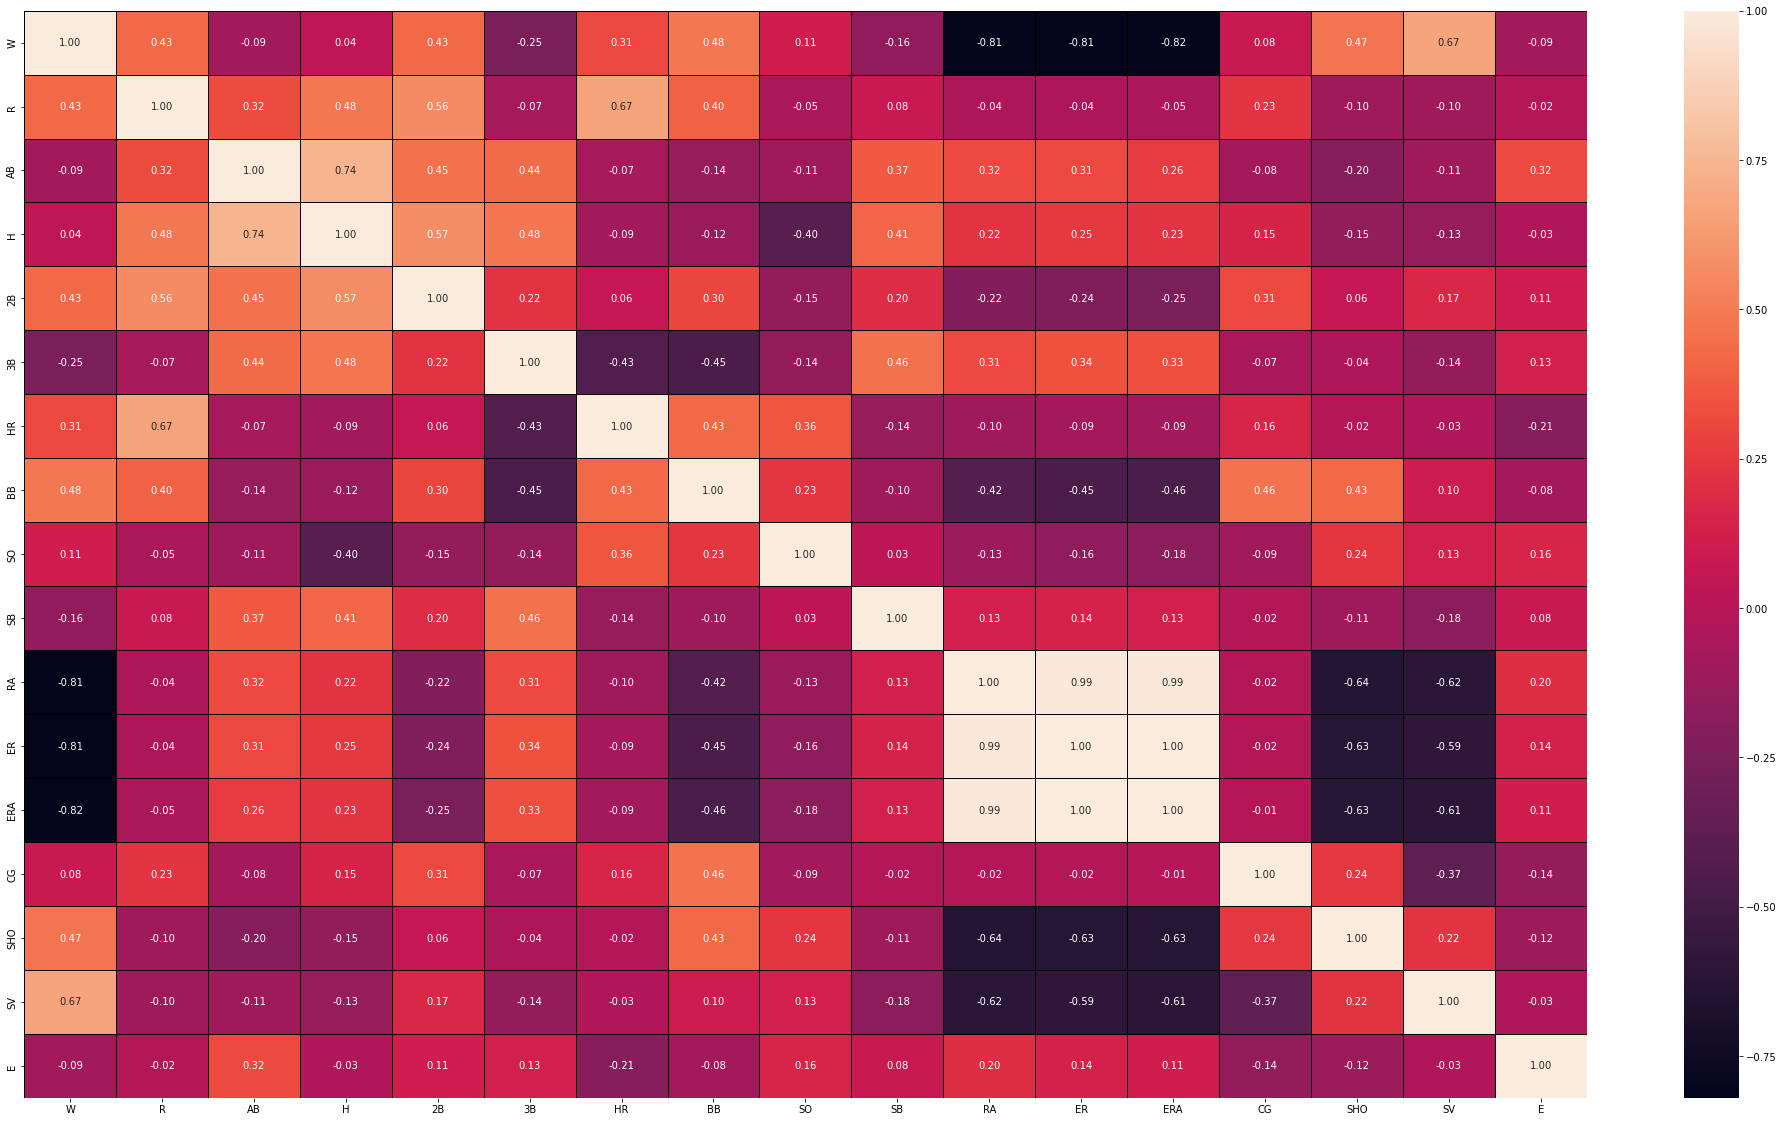

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(data.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

Observations from the heatmap
we see that there is 100% multicollinearity as in relationshoip btw the columns :-

ER and ERA
RA and ERA
RA and ER
This means it will lead to over fitting , so we must eliminate 2 of these columns and only keep one as it represents the rest of the 2, In this case we will keep ERA and eliminate ER and RA

We see that there is approx 74% correlation between H and AB whichis also pretty high so we will go ahead and remove on , In this case we will only keep AB as H has high correlation of 56% approx with 2B

We see correlation between R and HR but as we see that the relation is approx 67% and we have already removed the rest of the columns we will keep it till it does not drastically overfit or underfit the model

Therefore we will now move to remove thses columns after careful observations

### Deleting the features which are highly correlated to avoid Multicollinearity problem

In [52]:
data.drop(columns = ['ER','RA','H'], inplace=True)

In [53]:
#Dropping the duplicates
data.drop_duplicates(inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   2B      30 non-null     int64  
 4   3B      30 non-null     int64  
 5   HR      30 non-null     int64  
 6   BB      30 non-null     int64  
 7   SO      30 non-null     int64  
 8   SB      30 non-null     int64  
 9   ERA     30 non-null     float64
 10  CG      30 non-null     int64  
 11  SHO     30 non-null     int64  
 12  SV      30 non-null     int64  
 13  E       30 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 3.5 KB


<AxesSubplot:>

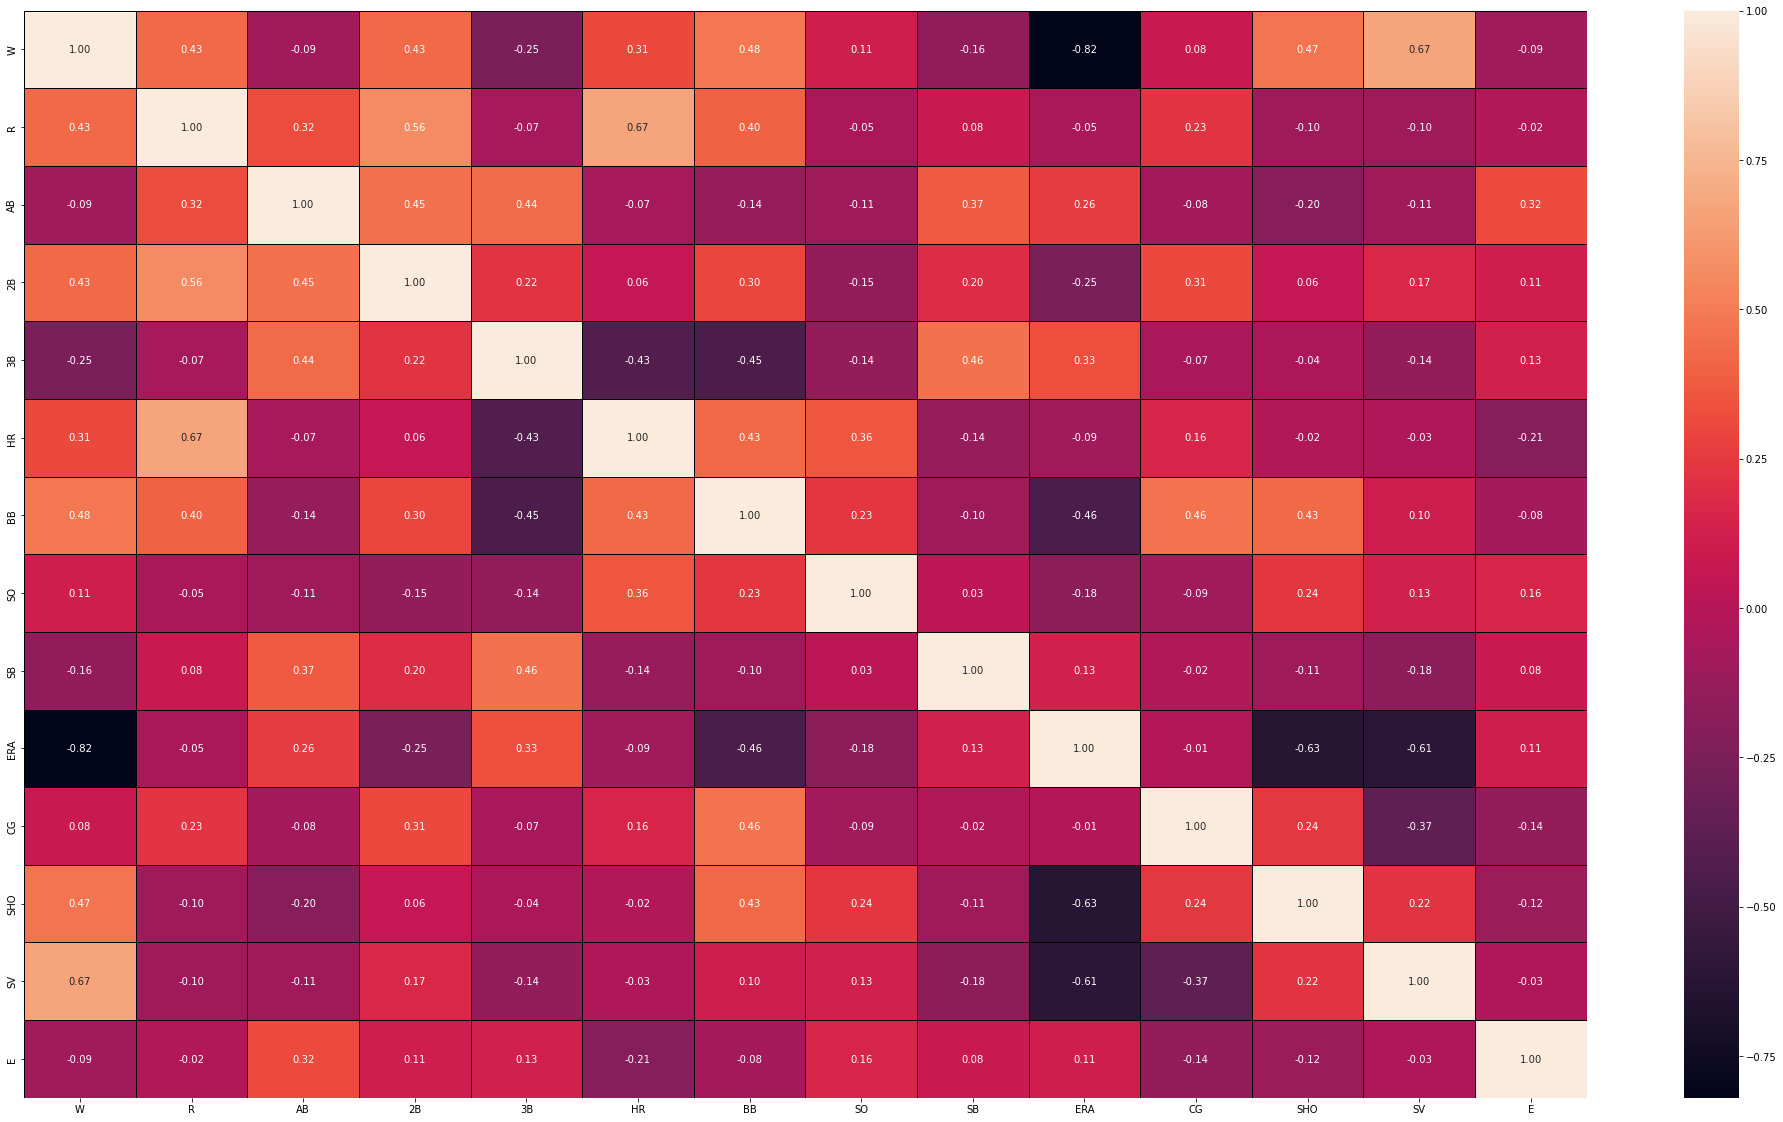

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(data.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

We have removed the features overfitting the model and the heatmap looks a lot better now

In [56]:
# Dividing the Features and Label again
X = data.drop(columns = ['W'])
y = data['W']


In [57]:
X #to see x or feature data

,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,289,49,151,455,1259,83,4.64,7,12,35,86
5,891,5509,308,17,232,570,1151,88,3.80,7,10,34,88
6,764,5567,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,294,33,161,478,1148,71,4.31,3,10,40,97


In [58]:
y #to see the target or label data

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [59]:
#Checking for Outliers
data.skew().sort_values()

2B    -0.230650
SO    -0.156065
W      0.047089
ERA    0.053331
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

We see that R and E has the highest skewness and 2B has the lowest skewness in the dataset so we will have to perform treatment to remove skewness so that our model will not biased

In [60]:
### Considering the outlier removal with Zscore

In [61]:
from scipy.stats import zscore

z = np.abs(zscore(data))

threshold = 3

np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [62]:
data_new_z = data[(z<3).all(axis=1)]
data_new_z

,W,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,4.64,7,12,35,86
6,87,764,5567,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,4.31,3,10,40,97
10,88,751,5511,279,32,172,503,1233,101,4.24,5,9,45,119


In [63]:
data_new_z.shape

(29, 14)

In [64]:
#Percentage of data loss:

data_loss = ((30-29)/30)*100

In [65]:
data_loss

3.3333333333333335

Approx 3.33% data loss and it is considerable for the dataset by removing and improving the data

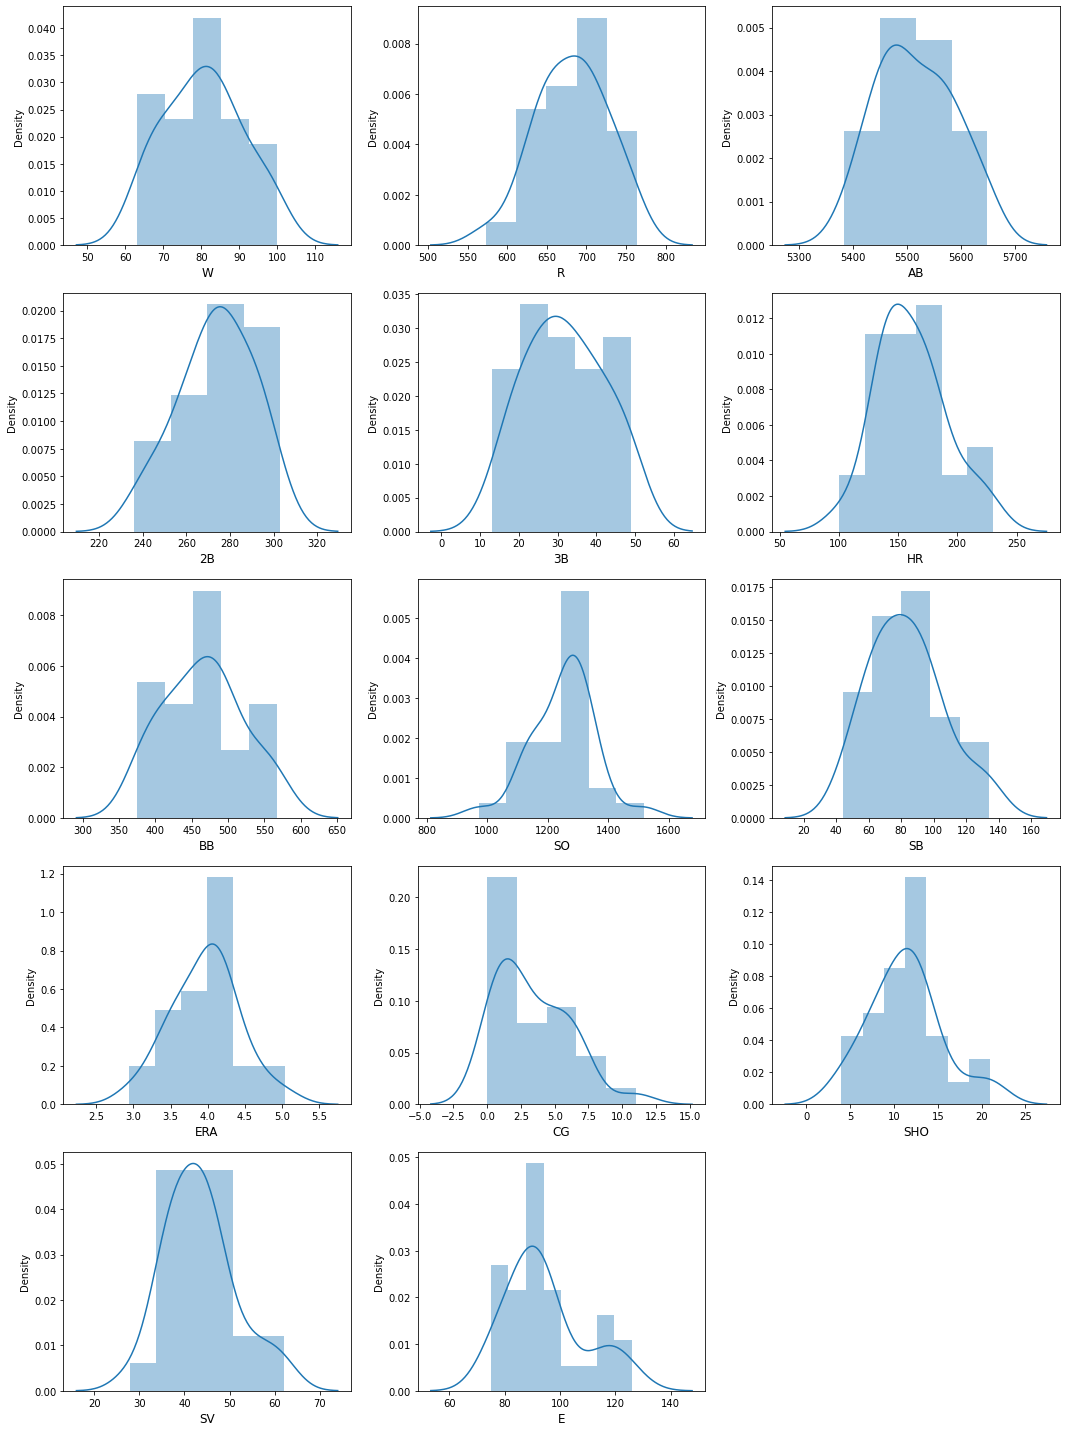

In [67]:
#Lets see how the data is distributed for every column after the treatment

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in data_new_z:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data_new_z[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

Great!! data looks much better for the further move

### Using SelectKBest Feature Selection Method

In [69]:
# Divide data into features and label

X = data_new_z.drop(columns = ['W'])
y = data_new_z['W']

In [70]:
from sklearn.feature_selection import SelectKBest, f_classif

In [71]:
best_features = SelectKBest(score_func = f_classif, k=13)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(13,'Score'))  #Print Best 17 features

   Feature_name     Score
7            SB  3.283197
11           SV  2.941436
12            E  2.492758
0             R  2.485509
8           ERA  1.732208
1            AB  1.622586
6            SO  1.519889
10          SHO  1.253358
5            BB  0.943327
4            HR  0.818974
3            3B  0.811129
2            2B  0.799063
9            CG  0.361597


We see that all the features except the CG are the best as the score they have are greater than 0.5 , but we are only performing this step as a way to analyze the data even further , but we will not remove any columns as the data shows that most of the column is good for prediction

### Variance Inflation Factor

for Multicollinearity problem,we will see if one feature is depending on the other , we need to scale the data first using MINMAX Scaler

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_scaled = scaler.fit_transform(X)


In [74]:
X_scaled.shape

(29, 13)

##Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1 -R2))

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

,vif,Features
0,4.428164,R
1,2.350073,AB
2,3.411045,2B
3,3.191726,3B
4,4.801655,HR
5,2.635823,BB
6,2.087109,SO
7,1.600146,SB
8,4.311503,ERA
9,2.267941,CG


As per analysis,  after we have skewed the data , the values are lesser than 5 for all the columns so we will not remove any columns and move to the next step

### Principal Component Analysis (PCA)

PCA is  reducing the number of variables of a data set, while preserving as much information as possible.

Only we'll apply the features merely, it is mainly used if there are too many features and no correlation with the target but its the final analysis we are going to do to chcek for multicollinearity problem

In [79]:
from sklearn.decomposition import PCA

pca = PCA()

In [80]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-1.97073453e+00, -1.37551442e+00,  2.10118392e+00,
        -9.84626985e-01, -2.71259667e+00,  5.80196270e-01,
         5.06870217e-01, -6.22760155e-03,  8.35370560e-01,
         6.27317187e-01,  3.70835030e-01, -1.10842302e-01,
        -6.91433539e-02],
       [-2.66898963e-01,  1.81843261e-01,  3.01083864e-01,
        -1.79804568e-01, -4.84578018e-01,  7.18452143e-01,
        -1.16729272e+00, -7.28789151e-01,  2.81733339e-01,
        -6.40590970e-01, -3.52675737e-01, -2.36984797e-02,
        -1.04467176e-01],
       [ 8.56120661e-01, -6.67248798e-01,  5.98150895e-01,
         3.20403893e+00, -1.24486045e+00, -4.47018503e-01,
         1.37523570e+00, -1.32740366e+00, -3.49191517e-02,
         2.45264807e-01, -6.11901156e-01,  1.78729961e-01,
         1.79811021e-01],
       [-8.47037504e-01,  1.54943948e+00,  1.38940898e-01,
         1.01348677e+00,  2.81107292e-01, -1.15891335e+00,
        -4.91099360e-02, -2.61731194e-01, -5.83356412e-01,
         1.25766302e+00,  3.81531560e

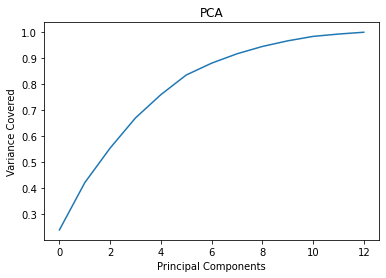

In [81]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

We see that in order to cover 95% - 100% of the data we need to have only have 9 features and we can remove the rest , We usually in this case will opt to remove , but as this is asmall dataset we will go ahead with it and only remove incase we really need to

### Choosing the Best Model:
    

### Linear Regression Model

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split





In [84]:
scores=[]
for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.9820512106365671
At random state 0,the testing accuracy is :-0.21886774607654813


At random state 1,the training accuracy is :-0.9576517667304753
At random state 1,the testing accuracy is :-0.7219831616255483


At random state 2,the training accuracy is :-0.9521117889124847
At random state 2,the testing accuracy is :--0.14127589681197228


At random state 3,the training accuracy is :-0.9725291660798843
At random state 3,the testing accuracy is :-0.3718332436191445


At random state 4,the training accuracy is :-0.9585193130249887
At random state 4,the testing accuracy is :-0.798506303724113


At random state 5,the training accuracy is :-0.9565662815028835
At random state 5,the testing accuracy is :-0.6078817362215837


At random state 6,the training accuracy is :-0.9637794173514648
At random state 6,the testing accuracy is :-0.6944165204167224


At random state 7,the training accuracy is :-0.938851673713115
At random state 7,the testing ac

### The Best Random state Observation is 286

At random state 286,the training accuracy is :-0.9398627440254177
At random state 286,the testing accuracy is :-0.9213593183858219


In [86]:
np.argmax(scores)

189

In [87]:
scores[np.argmax(scores)]

0.9606799728289226

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 286)

In [89]:
lr.fit(X_train,y_train)

LinearRegression()

In [90]:
pred_test=lr.predict(X_test)

In [91]:
print(r2_score(y_test,pred_test))

0.9213593183858219


#### We observed that among all the scores we see the ones which are better for our model is where the difference between the training and testing score is the least which is 286.

We also observe that we need to have a higher training score compared to testing score

But we are choosing random state :- At random state 286,the training accuracy is :-0.9398627440254177 At random state 286,the testing accuracy is :-0.9213593183858219

Reason being this state has the least of the least differnce betwwen the training and testing score and is the highest

### Cross-Validation of the model

In [92]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is -1.2375458261182444 and accuracy score for training is -0.9751506895863882and the accuracy for testing is 0.9213593183858219


At cross fold3 the cv score is 0.28881173741747074 and accuracy score for training is -0.9751506895863882and the accuracy for testing is 0.9213593183858219


At cross fold4 the cv score is 0.33834309722902006 and accuracy score for training is -0.9751506895863882and the accuracy for testing is 0.9213593183858219


At cross fold5 the cv score is 0.34061603705003496 and accuracy score for training is -0.9751506895863882and the accuracy for testing is 0.9213593183858219


At cross fold6 the cv score is 0.31420834408093234 and accuracy score for training is -0.9751506895863882and the accuracy for testing is 0.9213593183858219


At cross fold7 the cv score is 0.1600434570366886 and accuracy score for training is -0.9751506895863882and the accuracy for testing is 0.9213593183858219


At cross fold8 the cv score is 0.3983170967744517 and

As we observe that we are getting really bad score of cross validation, training score - 97.5% and testing score is verly low 92.13%.

We need to keep in mind that the size of data , as a factor which could make the model feel the data is overfitted as well

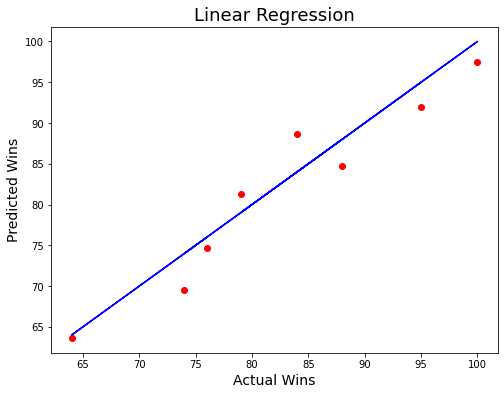

In [95]:
#Plotting the linear Regression graph with actual and predicted values comparison

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

It is looking good, the model is doing well, here we see the actual and predicted are on the same line which is really good

### Regularization of the Linear Model


In [98]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,15))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

NameError: name 'GridSearchCV' is not defined

Final model training for Linear Regression

In [101]:
ls = Lasso(alpha= 1, random_state= 0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

88.73232683489375

We are getting a good lasso score of 88.73% which is very high to the cross val score 39% approx for training we got earlier so we can cosider the model is doing moderaltely well but not good enough we need to test more models

### MSE,RMSAE score

In [103]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 2.7521768973240466
MSE: 9.476202134508469
RMSE: 3.07834405720161


Good Metric scores, so we will move on for differnt modelselection which is the best one

### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
pred_test =dt.predict(X_test)
dfs = r2_score(y_test,pred_test)
print('R2 Score :',dfs*100)

dfscore = cross_val_score(dt,X_scaled,y,cv=2)
dfc =dfscore.mean()
print('Cross Val Score :',dfc*100)

R2 Score : 42.84232365145228
Cross Val Score : -35.383266829914774


### We observe that for Decision tree regressor :-
    
The model is not at all working well for the data set and we see that the score is ok compared to linear regression model

we also see that the cross val score is also good compared to linear , and we will thiknk over the linear model

we see that the score is much much than Linear regression model of 92% approx

we will try another model which is knn

### K- Nearest Neighbors

In [107]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred_test =knn.predict(X_test)
knns = r2_score(y_test,pred_test)
print('R2 Score :',knns*100)

knnscore = cross_val_score(knn,X_scaled,y,cv=2)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)


R2 Score : 47.2780082987552
Cross Val Score : 15.680722423851428


We observe that for K-nearest neighbors :-

The model is not at all working well for the data set and we see that the score is very low compared to linear regression model and Decision tree

we also see that the cross val score is alos very bad compared to linear , and we cannot choose this over the linear model but its better that Decision tree cv score

there is very high difference between the r2 score 47.27% and cross val score 15.68%

we see that the score is much much than Linear regression model of 92% approx

trying the next model which is Enseble techniques , and we will use Random Forest Regressor


### Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

In [111]:
scores=[]
for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test = rf.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.9235107264405586
At random state 0,the testing accuracy is :-0.44913393789502654


At random state 1,the training accuracy is :-0.9404785064203649
At random state 1,the testing accuracy is :-0.7924400224845419


At random state 2,the training accuracy is :-0.9227094817432273
At random state 2,the testing accuracy is :--1.0975343262902664


At random state 3,the training accuracy is :-0.9135254466151275
At random state 3,the testing accuracy is :-0.5610695568194015


At random state 4,the training accuracy is :-0.9189445265520454
At random state 4,the testing accuracy is :-0.7670532378891293


At random state 5,the training accuracy is :-0.9327035461272041
At random state 5,the testing accuracy is :-0.5711465838509316


At random state 6,the training accuracy is :-0.9240030570715013
At random state 6,the testing accuracy is :-0.6717722222222222


At random state 7,the training accuracy is :-0.9527110971730657
At random state 7,the testing a

In [112]:
np.argmax(scores)

129

In [113]:
scores[np.argmax(scores)]

0.9061116863905324

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 129)

In [115]:

rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision =rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)


rfscore = cross_val_score(rf,X_scaled,y,cv=4)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 89.96149408284022
Cross Val Score : 56.08958992507935


### We observe that for Random Forest Regressor :-

The model is not working well for the data set and we see that the score is very low compared to linear regression model 

we also see that the cross val score is worst compared to linear, but we cannot choose this over the linear model because its bad score of cv @ 46.58%

there is difference between the r2 score 43.55% and cross val score 46.58%

tryin the next model which is Ensemble techniques , and we will use Ada boosted Trees

### ADA Boost Regressor

In [118]:
scores=[]
for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    ada.fit(X_train,y_train)
    pred_train = ada.predict(X_train)
    pred_test = ada.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.989818409782078
At random state 0,the testing accuracy is :-0.4751152636560715


At random state 1,the training accuracy is :-0.9884209256890655
At random state 1,the testing accuracy is :-0.7509212416463682


At random state 2,the training accuracy is :-0.9847562258118795
At random state 2,the testing accuracy is :--0.9768188148137682


At random state 3,the training accuracy is :-0.9869844524207511
At random state 3,the testing accuracy is :-0.661479176354163


At random state 4,the training accuracy is :-0.9946309265216722
At random state 4,the testing accuracy is :-0.7806263063462997


At random state 5,the training accuracy is :-0.9962309958618208
At random state 5,the testing accuracy is :-0.7114981076725276


At random state 6,the training accuracy is :-0.9882319744213026
At random state 6,the testing accuracy is :-0.6439634495773617


At random state 7,the training accuracy is :-0.9942761674357481
At random state 7,the testing accu

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 655)

In [117]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)
ada.score(X_train,y_train)
pred_decision =ada.predict(X_test)

adas = r2_score(y_test,pred_decision)
print('R2 Score :',adas*100)

adascore = cross_val_score(ada,X_scaled,y,cv=7)
adac =adascore.mean()
print('Cross Val Score :',adac*100)


R2 Score : 57.76202253366309
Cross Val Score : -50.16553463528414


In [120]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 8.7375
MSE: 96.14125
RMSE: 9.805164455530566


### We observe that for ADA Boost Regressor :-
    
The model is not working well for the data set and we see that the score is very low compared to linear regression model , but higher than Decision Tree as well as Knn Regressor and lower that Random forest

we also see that the cross val score is a much much lower compared to linear and all the models , we cannot choose this over the linear model

there is very high difference between the r2 score 71.68% and cross val score -68.82%

we see that the score is lesser than Linear regression model of 96% approx

tryin the next model which is SVR model

### SVR -Support Vector Regression

In [121]:
from sklearn.svm import SVR
svr = SVR()

In [122]:
scores=[]
for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    svr.fit(X_train,y_train)
    pred_train = svr.predict(X_train)
    pred_test = svr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.20460193919616254
At random state 0,the testing accuracy is :--0.033555607438473745


At random state 1,the training accuracy is :-0.20048014302065587
At random state 1,the testing accuracy is :-0.08924532668049223


At random state 2,the training accuracy is :-0.25790465633656123
At random state 2,the testing accuracy is :--3.2053508979608045


At random state 3,the training accuracy is :-0.22149938782708511
At random state 3,the testing accuracy is :-0.045566303662481156


At random state 4,the training accuracy is :-0.19747793414745207
At random state 4,the testing accuracy is :-0.07365461224351144


At random state 5,the training accuracy is :-0.22340669747237052
At random state 5,the testing accuracy is :-0.05468332113683716


At random state 6,the training accuracy is :-0.24631831459249598
At random state 6,the testing accuracy is :-0.06800206326809721


At random state 7,the training accuracy is :-0.1930843208129044
At random state 

In [123]:
np.argmax(scores)

989

In [124]:
scores[np.argmax(scores)]

0.1944911748562297

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 989)

In [126]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_decision =svr.predict(X_test)

svrs = r2_score(y_test,pred_decision)
print('R2 Score :',svrs*100)

svrscore = cross_val_score(svr,X,y,cv=8)
svrc =svrscore.mean()
print('Cross Val Score :',svrc*100)


R2 Score : 0.04052248477461884
Cross Val Score : -78.56388852727892


We see that SVR is really not a good model for this data set as the values it is giving is inaccurate and highly not usable as we are getting negative -78.56% on cross val and R2 score as 4% accurate we will not consider this model

## So in conclusion we can choose Linear Regression as the BEST MODEL for the dataset

### Hyper parameter Tuning with SGD



In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#Creating parameters to pass in GridSearchCV

parameters = {'loss' :['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
             'penalty' :['l1', 'l2', 'elasticnet'],
             'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [1, 10, 100]
             }
lr=SGDRegressor()
clf= GridSearchCV(lr,parameters,cv=8,verbose=2,n_jobs=-1)
clf.fit(X_train,y_train)

print(clf.best_params_)

Fitting 8 folds for each of 1008 candidates, totalling 8064 fits
{'alpha': 100, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}


In [128]:
lr=SGDRegressor(alpha=1,eta0=1,learning_rate='adaptive',loss='squared_epsilon_insensitive',penalty='elasticnet')

In [129]:
scores=[]
for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.7939714977212834
At random state 0,the testing accuracy is :--0.16149733215537432


At random state 1,the training accuracy is :-0.8537476889611898
At random state 1,the testing accuracy is :-0.8751769123051246


At random state 2,the training accuracy is :-0.7310111741731782
At random state 2,the testing accuracy is :--0.4492922889504116


At random state 3,the training accuracy is :-0.7554853068278011
At random state 3,the testing accuracy is :-0.7051531477000024


At random state 4,the training accuracy is :-0.8009602235129489
At random state 4,the testing accuracy is :-0.7439054369476683


At random state 5,the training accuracy is :-0.7773986915107592
At random state 5,the testing accuracy is :-0.23836811475929576


At random state 6,the training accuracy is :-0.8437196237902896
At random state 6,the testing accuracy is :-0.6216358015032912


At random state 7,the training accuracy is :-0.8268326783605268
At random state 7,the testing

In [130]:
np.argmax(scores)

900

In [131]:
scores[np.argmax(scores)]

0.9512923525971865

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 292)

In [133]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
pred_decision =lr.predict(X_test)

lrs = r2_score(y_test,pred_decision)
print('R2 Score :',lrs*100)

lrscore = cross_val_score(lr,X_scaled,y,cv=2)
lrc =lrscore.mean()
print('Cross Val Score :',lrc*100)

R2 Score : 95.08550758826519
Cross Val Score : -81.5545335762071


## OBSERVATIONS ON FINAL SCORES FROM LINEAR REGRESSION or SGD Regressor

We see that the accuracy score has dipped down a little bit from Linear Model which has 96% but as we cannot do hyperparameter tuning on the Linear regression Model we will use this but the model we cjose had on 92% so overall we have the best test score in linear model

We see that the Cross val score is again very very low and shows that the dataset is not able to come over the problem of over fitting due to its size , But after tuning we see that we have an increase of 3% approx

We also see that we have good MAE and MSE scores compared to the rest of the models and we have chosed the actuall best model for this data set even with all the constraints

So fnally we choose this model and move it into saved folder to be used - SGD Regressor

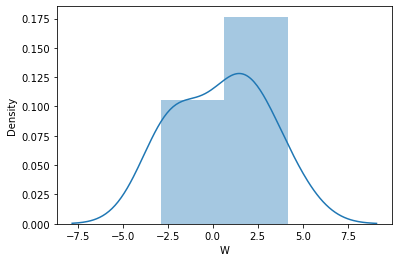

In [134]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

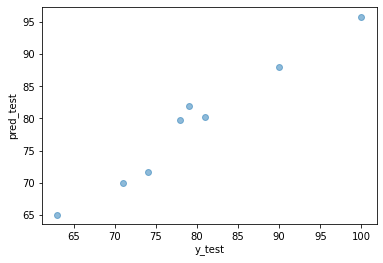

In [135]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

In [136]:
import pickle
filename = 'baseball_scores.pkl'
pickle.dump(lr,open(filename,'wb'))

### Conclusion

In [137]:
loaded_model = pickle.load(open('baseball_scores.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

95.08550758826519


In [138]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [139]:
conclusion

,0,1,2,3,4,5,6,7
Predicted,81.892043,95.811238,79.831781,65.061299,80.18603,69.996945,71.664761,87.97865
Orignal,81.892043,95.811238,79.831781,65.061299,80.18603,69.996945,71.664761,87.97865


### We see that the model has predicted the charges on 8 columns against the actual charges , the LinearModel which we have chosen as the best one